## 3.2 Kreuzvalidierung und Modellselektion

Bei der Methode der Kreuzvalidierung wird der zufällige Split in Trainings- und Testdatensatz aus Aufgabe 1 mehrere Male wiederholt und der Durchschnitt über mehrere Splits berechnet, um eine genauere Schätzung der wirklichen Treffergenauigkeit zu erhalten. *Scikit Learn* stellt dafür bereits eine vordefinierte Methode zur Verfügung: `sklearn.model_selection`. Die Methode verwendet die Iteratorsyntax von Python, Beispiele zur Verwendung finden Sie in der Dokumentation dieser Methode. `ShuffleSplit()` erzeugt einen Satz von permutierten Indizes von Trainings- und Testdaten.

Aufgaben:
- [3.2.1 Kreuzvalidierung mittels ShuffleSplit](#3.2.1-Kreuzvalidierung-mittels-ShuffleSplit)
- [3.2.2 Kreuzvalidierung mittels cross_val_score](#3.2.2-Kreuzvalidierung-mittels-cross_val_score)

___

### 3.2.1 Kreuzvalidierung mittels ShuffleSplit

Erzeugen Sie zunächst 3 Sätze und trainieren Sie für jeden Satz eine SVM mit $\gamma = 0.001$ und $C = 1$ und geben Sie jeweils die Treffergenauigkeit für Trainings- und Testdatensatz aus. Die Ergebnisse sollten ähnlich wie in Aufgabe 1b aussehen.

In [64]:
from sklearn import datasets, svm
from sklearn.model_selection import ShuffleSplit

Wie im ersten Aufgabenteil wird zuerst der Datensatz geladen. Für eine bessere Lesbarkeit wird der Datensatz hier bereits wie folgt aufgeteilt:

- $X$: Merkmalsmatrix (enthält die Bilddaten `digits.data`)
- $y$: Zielvektor (enthält die Labels `digits.target`)

In [65]:
digits = datasets.load_digits()

X = digits.data
y = digits.target

In [66]:
X.shape

(1797, 64)

In [67]:
y.shape

(1797,)

Anschließend wird die Kreuzvalidierung mit 3 Splits durchgeführt wobei die ursprüngliche Aufteilung in Trainings- und Testdatensatz (75% / 25%) beibehalten wird.

> Der `random_state` Parameter wird auch hier wieder genutzt um ein reproduzierbares Ergebnis zu gewährleisten.

In [68]:
cv = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0) # cv = cross validation
cv

ShuffleSplit(n_splits=3, random_state=0, test_size=0.25, train_size=None)

#### Sidequest: Split Visualization

Unter [Datenvisualisierung in scikit](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html) wird eine Möglichkeit gezeigt, wie die verschiedenen Splits visualisiert werden können. Dies wurde hier für das aktuelle Beispiel umgesetzt wobei die Trainingsdaten in Blau und die Testdaten in Orange dargestellt werden.

1347 450
1347 450
1347 450


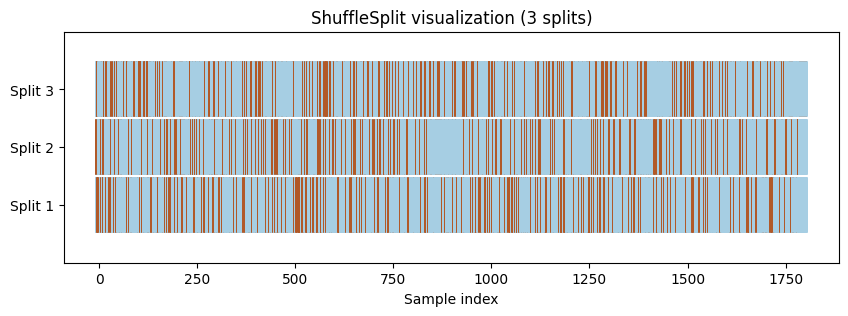

In [69]:
import matplotlib.pyplot as plt
import numpy as np

_, ax = plt.subplots(figsize=(10,3))

for i, (train_index, test_index) in enumerate(cv.split(X, y)):
  print(f"{len(train_index)} {len(test_index)}")
  mask = np.zeros(len(X))
  mask[train_index] = 1
  mask[test_index] = 2

  ax.scatter(
    range(len(X)),
    [i] * len(X),
    marker='_',
    lw=40,
    c=mask,
    cmap=plt.cm.Paired
  )

ax.set_ylim([-1, 3])
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(["Split 1", "Split 2", "Split 3"])
ax.set_xlabel("Sample index")
ax.set_title("ShuffleSplit visualization (3 splits)")

plt.show()

#### Training der SVM

Anschließend wird für jeden Split eine SVM mit den angegebenen Hyperparametern trainiert und die Treffergenauigkeit für Trainings- und Testdatensatz ausgegeben. `cv.split(X)` liefert dabei die Indizes für Trainings- und Testdatensatz zurück, welche genutzt werden um die entsprechenden Daten aus `X` und `y` zu extrahieren.

> Die Ausgabe für folgende Code:
> ```python
> for train_index, test_index in cv.split(X, y):
>    print(f"{train_index} {test_index}")
> ```
> würde gekürzt wie folgt aussehen:
> ```plaintext
> [1166 1471  432   77 1017  ...   71 1742 1772] [1081 1707  927  713  ... 1322 1354  231 1793 1045]
> ```
> Das erste Array enthält dabei die Indies für den Trainingsdatensatz (z.B. `X[1166]` und `y[1166]`) und das zweite Array die Indizes für den Testdatensatz (z.B. `X[1081]`, `y[1081]`, ...).

In [70]:
svm_gamma = 0.001
svm_C = 1

split_id = 1
for train_index, test_index in cv.split(X, y):
    print(f"\nSplit: {split_id}")
    #print(f"{train_index} {test_index}")

    # Extrahieren der Trainings- und Testdaten aus dem Split
    X_train = X[train_index]
    y_train = y[train_index]

    X_test = X[test_index]
    y_test = y[test_index]

    # SVM mit den entsprechenden Parametern definieren
    clf = svm.SVC(gamma=svm_gamma, C=svm_C)

    # Trainieren der svm mit dem aktuellen Split
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"Accuracy (Trainingsset):\t{clf.score(X_train, y_train)}")
    print(f"Accuracy (Testset):\t\t{clf.score(X_test, y_test)}")

    split_id += 1
    


Split: 1
Accuracy (Trainingsset):	0.9992576095025983
Accuracy (Testset):		0.9955555555555555

Split: 2
Accuracy (Trainingsset):	0.9985152190051967
Accuracy (Testset):		0.9955555555555555

Split: 3
Accuracy (Trainingsset):	0.9992576095025983
Accuracy (Testset):		0.9933333333333333


#### Fazit:
Die Treffergenauigkeiten für die einzelnen Splits verhält sich entgegen der Erwartung nicht wie im ersten aufgabenteil (siehe [Exercise 3.1](exercise_3_1.ipynb)). Die *Accuracy* auf dem Trainingsdatensatz ist etwas geringer wobei die *Accuracy* auf dem Testdatensatz etwas höher ist. Dies liegt daran, dass durch die Kreuzvalidierung die Varianz der Schätzung der Treffergenauigkeit reduziert wird. Insgesamt sind die Ergebnisse stabiler und weniger anfällig für Ausreißer in den Daten.

Wird der Test jedoch auf dir ursprünglichen Werde mit $\gamma = 0.015$ und $C = 1$ durchgeführt, so liegt das Ergebnis deutlich näher an dem aus dem ersten Aufgabenteil ohne Optimierung:

In [71]:
svm_gamma = 0.015
svm_C = 1

split_id = 1
for train_index, test_index in cv.split(X, y):
    print(f"\nSplit: {split_id}")
    #print(f"{train_index} {test_index}")

    # Extrahieren der Trainings- und Testdaten aus dem Split
    X_train = X[train_index]
    y_train = y[train_index]

    X_test = X[test_index]
    y_test = y[test_index]

    # SVM mit den entsprechenden Parametern definieren
    clf = svm.SVC(gamma=svm_gamma, C=svm_C)

    # Trainieren der svm mit dem aktuellen Split
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"Accuracy (Trainingsset):\t{clf.score(X_train, y_train)}")
    print(f"Accuracy (Testset):\t\t{clf.score(X_test, y_test)}")

    split_id += 1


Split: 1
Accuracy (Trainingsset):	1.0
Accuracy (Testset):		0.5155555555555555

Split: 2
Accuracy (Trainingsset):	1.0
Accuracy (Testset):		0.45555555555555555

Split: 3
Accuracy (Trainingsset):	1.0
Accuracy (Testset):		0.3711111111111111


___

### 3.2.2 Kreuzvalidierung mittels cross_val_score

Statt wie in [3.2.1](#3.2.1-Kreuzvalidierung-mittels-ShuffleSplit) von Hand vorzugehen gibt es in *Scikit Learn* die bereits vordefinierte Methode `sklearn.model_selection.cross_val_score()`. Wiederholen Sie Ihr Experiment aus Aufgabe [3.2.1](#3.2.1-Kreuzvalidierung-mittels-ShuffleSplit) mit 10 Zufallssplits und geben Sie jeweils die Treffergenauigkeit auf dem Testdatensatz aus. Berechnen Sie die mittlere Treffergenauigkeit (die **Kreuzvalidierungsgenauigkeit**) und die Standardabweichung des Mittelwerts.

In [72]:
from sklearn import datasets, svm
from sklearn.model_selection import cross_val_score

Wie im vorherigen Aufgabenteil wird zuerst der Datensatz geladen und eine Support Vector Machine (SVM) mit den Parametern $\gamma = 0.001$ und $C = 1$ erstellt.

In [73]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [74]:
clf = svm.SVC(gamma=0.001, C=1)
clf

SVC(C=1, gamma=0.001)

Das folgende Beispiel beruht auf der Dokumentation von scikit-learn [3.1.1 Computing cross-validated metrics](https://scikit-learn.org/stable/modules/cross_validation.html).

Es zeigt, wie die Genauigkeit einer Support-Vektor-Maschine geschätzt werden kann, indem die Daten aufgeteilt, ein Modell gefittet und der Score zehnmal hintereinander berechnet wird (jedes Mal mit unterschiedlichen Aufteilungen):

In [75]:
scores = cross_val_score(clf, X, y, cv=10)

Anschließend lässt sich die Treffergenauigkeit auf den einzelnen Testsets mittels dem return-value der Funktion `cross_val_score()` ausgeben.

In [76]:
scores

array([0.95      , 1.        , 0.95      , 0.98333333, 0.98888889,
       0.98888889, 0.99444444, 0.99441341, 0.96648045, 0.96648045])

Die **Kreuzvalidierungsgenauigkeit** (mean accuracy) und die **Standardabweichung des Mittelwerts** (standard deviation) können entweder mittels `numpy` oder direkt über die `scores` Variable berechnet werden:

In [77]:
print("Mittlere Kreuzvalidierungsgenauigkeit:", scores.mean())
print("Standardabweichung:", scores.std())

Mittlere Kreuzvalidierungsgenauigkeit: 0.9782929857231533
Standardabweichung: 0.01766901739189916


Laut Dokumentation verwendet `cross_val_score` standardmäßig die Strategien `KFold` oder `StratifiedKFold` wenn das Argument `cv` eine ganze Zahl ist, wobei letztere verwendet wird, wenn der Schätzer von `ClassifierMixin` abgeleitet ist.

Es ist jedoch auch möglich, andere **Kreuzvalidierungsstrategien** zu verwenden (wie z.B. der `ShuffleSplit` aus Aufgabe [3.2.1](3.2.1-Kreuzvalidierung-mittels-ShuffleSplit)), indem stattdessen ein **Kreuzvalidierungsiterator** übergeben wird:

In [78]:
from sklearn.model_selection import ShuffleSplit

# Wieder mit 10 Splits
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)

scores = cross_val_score(clf, X, y, cv=cv)

In [79]:
scores

array([0.99555556, 0.99555556, 0.99333333, 0.99333333, 0.98888889,
       0.99333333, 0.99111111, 0.99555556, 0.99111111, 0.98888889])

In [80]:
print("Mittlere Kreuzvalidierungsgenauigkeit:", scores.mean())
print("Standardabweichung:", scores.std())

Mittlere Kreuzvalidierungsgenauigkeit: 0.9926666666666668
Standardabweichung: 0.0024444444444444114


### 3.2.3 Parameterselektion mittels Kreuzvalidierung

Mithilfe der *Kreuzvalidierungsgenauigkeit* können die optimalen $\gamma$- und $C$-Parameter der SVM automatisch gefunden werden. Dieser Vorgang heißt *Modellselektion*. Man führt zu diesem Zweck eine Gittersuche durch: zunächst wird ein Satz von Werten für $\gamma$ und $C$ festgelegt. Für alle Wertepaare wird die **Kreuzvalidierungsgenauigkeit** bestimmt und dann
die Parameter gewählt, die die höchste Treffergenauigkeit erzielen. 

Finden Sie auf diese Weise für $C = 10$ den besten Gammawert aus einem Satz von 10 logarithmisch skalierten Gammawerten, erzeugt mit

In [81]:
import numpy as np
gammas = np.logspace(-7, -1, 10)
gammas

array([1.00000000e-07, 4.64158883e-07, 2.15443469e-06, 1.00000000e-05,
       4.64158883e-05, 2.15443469e-04, 1.00000000e-03, 4.64158883e-03,
       2.15443469e-02, 1.00000000e-01])

Verwenden Sie dazu eine Trainings- und Testdatensatzgröße von 500 und 5 Splits (s. Dokumentation von [`ShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html)) und speichern Sie die Treffergenauigkeit auf dem Trainings- und Testdatensatz für jeden Gammawert und Split. Plotten Sie die Treffergenauigkeitskurve für jeden Split mit dem Gammawert als Abszisse in einem gemeinsamen Diagramm, jeweils für die Trainings- und die Testdaten. Diese Kurven werden **Validierungskurven** genannt
(s.u.). Für welche Gammawerte erhalten Sie Underfitting, für welche Overfitting? Wo liegt der optimale Gammawert?

<img src="validierungskurve.png" alt="drawing" width="500"/>

In [82]:
from sklearn import datasets, svm
from sklearn.model_selection import ShuffleSplit

In [83]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

Laut der Dokumentation von [`ShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html) lässt sich die Test- und Trainingsdatensatzgröße über die Argumente `test_size` und `train_size` auch mittels `int` Wert auf eine absolute Anzahl an Beispielen festlegen (bei Angabe von `float` Werten wird die Größe als Anteil der Gesamtdaten interpretiert).

In [84]:
cv = ShuffleSplit(n_splits=5, test_size=500, train_size=500, random_state=0)

Dies lässt sich anschließend entweder textuell prüfen...

In [85]:
for i, (train_index, test_index) in enumerate(cv.split(X,y)):
  print(f"Split {i}: train_size = {len(train_index)} test_size = {len(test_index)}")

Split 0: train_size = 500 test_size = 500
Split 1: train_size = 500 test_size = 500
Split 2: train_size = 500 test_size = 500
Split 3: train_size = 500 test_size = 500
Split 4: train_size = 500 test_size = 500


oder wieder visuell. Hierbei muss jedoch auch eine eigene `ColorMap` definiert werden um darzustellen, welche Datenpunkte eines Splits nicht genutzt wurden (grau).

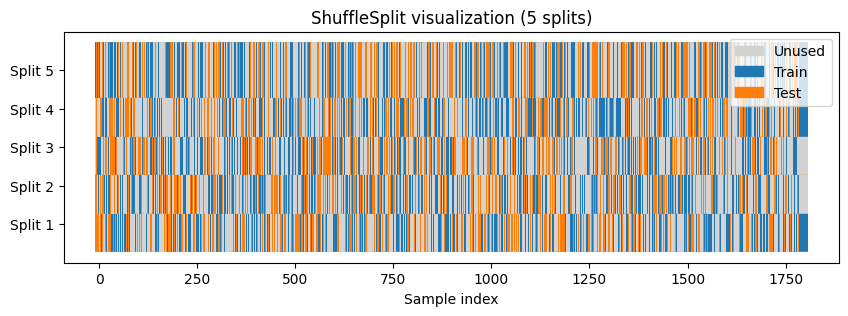

In [86]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

_, ax = plt.subplots(figsize=(10,3))

# eigenes Colormap zur Darstellung der nicht genutzten Daten: 0 = unused (hellgrau), 1 = train (blau), 2 = test (orange)
cmap = ListedColormap(["lightgray", "tab:blue", "tab:orange"])

for i, (train_index, test_index) in enumerate(cv.split(X, y)):
  mask = np.zeros(len(X))
  mask[train_index] = 1
  mask[test_index] = 2

  ax.scatter(
    range(len(X)),
    [i] * (len(X)),
    marker='_',
    lw=40,
    c=mask,
    cmap=cmap
  )

# Legendeneinträge für die einzelnen Farben im Plot erstellen
import matplotlib.patches as Patch
handles = [
    Patch.Patch(color="lightgray", label="Unused"),
    Patch.Patch(color="tab:blue", label="Train"),
    Patch.Patch(color="tab:orange", label="Test"),
]
ax.legend(handles=handles, loc="upper right", frameon=True)

ax.set_ylim([-1, 5])
ax.set_yticks([0, 1, 2, 3, 4])
ax.set_yticklabels(["Split 1", "Split 2", "Split 3", "Split 4", "Split 5"])
ax.set_xlabel("Sample index")
ax.set_title("ShuffleSplit visualization (5 splits)")
plt.show()

In [87]:
len(gammas)

10

Zur nachvollziehbaren Verwaltung der Genauigkeitswerte für die verschiedenen Gammawerte und Splits können zwei 2D-Arrays verwendet werden, in denen die Zeilen den Splits und die Spalten den Gammawerten entsprechen:

In [88]:
train_scores = np.zeros((5, len(gammas)))
test_scores = np.zeros((5, len(gammas)))

Anschließend wird wie zuvor für jeden Split für jeden Gammawert eine SVM trainiert und die Treffergenauigkeit für Trainings- und Testdatensatz gespeichert.

In [89]:
svm_C = 10

for split_id, (train_index, test_index) in enumerate(cv.split(X, y)):
    #print(f"Split: {split_id}")
    #print(f"{train_index} {test_index}")
    
    # Extrahieren der Trainings- und Testdaten aus dem Split
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    
    for gamma_id, gamma in enumerate(gammas):
        # SVM mit aktuellem gamma Wert aus gammas array
        clf = svm.SVC(gamma=gamma, C=svm_C)
    
        # Trainieren der svm mit dem aktuellen Split
        clf.fit(X_train, y_train)

        # Genauigkeiten in arrays speichern
        train_scores[split_id, gamma_id] = clf.score(X_train, y_train)
        test_scores[split_id, gamma_id] = clf.score(X_test, y_test)

Das `train_scores` und `test_scores` Array enthalten anschließend die Genauigkeitswerte für die Trainings- und Testdatensätze der verschiedenen Splits und Gammawerte.

In [90]:
print(train_scores)

[[0.128 0.128 0.88  0.966 0.99  1.    1.    1.    1.    1.   ]
 [0.22  0.22  0.904 0.962 0.99  1.    1.    1.    1.    1.   ]
 [0.122 0.122 0.9   0.968 0.99  1.    1.    1.    1.    1.   ]
 [0.12  0.172 0.83  0.962 0.988 1.    1.    1.    1.    1.   ]
 [0.12  0.12  0.872 0.962 0.994 1.    1.    1.    1.    1.   ]]


In [91]:
print(test_scores)

[[0.108 0.108 0.844 0.946 0.964 0.978 0.984 0.886 0.126 0.108]
 [0.184 0.184 0.882 0.946 0.972 0.986 0.986 0.948 0.17  0.104]
 [0.078 0.078 0.876 0.954 0.976 0.982 0.984 0.916 0.108 0.078]
 [0.08  0.116 0.768 0.946 0.97  0.966 0.98  0.93  0.104 0.082]
 [0.086 0.088 0.794 0.922 0.942 0.962 0.972 0.926 0.126 0.086]]


Diese werden dann noch wie in der Aufgabenbeschreibung gefordert geplottet.

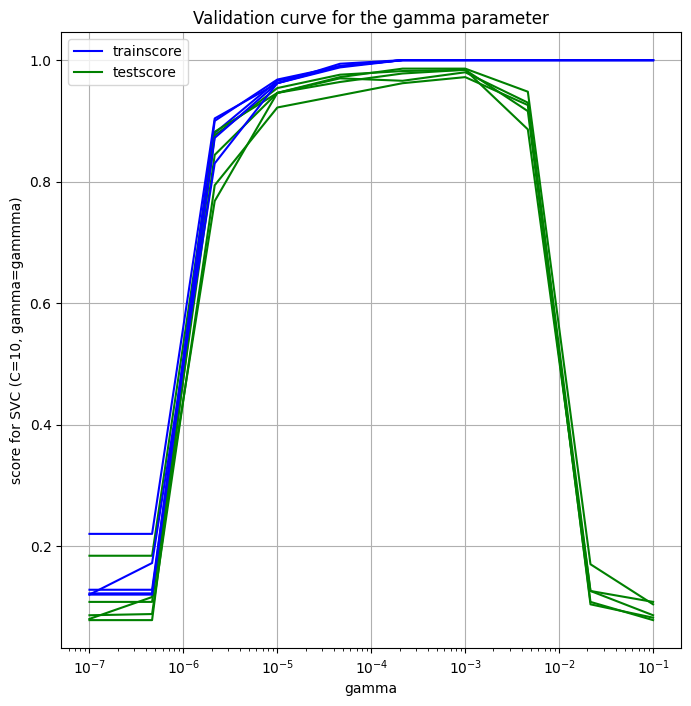

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

# Visualisierung der Trainingskurven
for i in range(5):
    if i == 0: # verhindert dass die labels 5mal auftauchen
        plt.plot(gammas, train_scores[i], 'b-', label='trainscore')
        plt.plot(gammas, test_scores[i], 'g-', label='testscore')
    else:
        plt.plot(gammas, train_scores[i], 'b-')
        plt.plot(gammas, test_scores[i], 'g-')

plt.xscale('log')
plt.yscale('linear')
plt.title("Validation curve for the gamma parameter")
plt.xlabel("gamma")
plt.ylabel("score for SVC (C=10, gamma=gammma)")
plt.grid(True)
plt.legend(loc='best', fancybox=True)
plt.show()

#### Fazit (Interpretation der Validierungskurven):

Die Validierungskurven liefern interessante Informationen und lassen sich in drei Bereiche unterteilen die jeweils unterschiedliche Eigenschaften aufweisen:
- Sehr **kleine** $\gamma$ Werte (*z. B. 1e-7 … 1e-5*)
    - Niedrige Trainingsgenauigkeit & niedrige Testgenauigkeit
    - Die Kurven sind fast gleich (beide schlecht)
    - Die Entscheidungsgrenzen sind offensichtlich zu glatt und das Modell zu einfach → **Underfitting**
- Sehr **große** $\gamma$ Werte (*z. B. 1e-2 … 1e-1*)
    - Sehr hohe Trainingsgenauigkeit (≈ 100 %) aber deutlich niedrigere Testgenauigkeit
    - Die Kurven entfernen sich stark voneinander
    - Das Modell reagiert offensichtlich extrem empfindlich auf einzelne Punkte → **Overfitting**
- **Optimum** (sweet spot)
    - Hohe Trainingsgenauigkeit & hohe Testgenauigkeit
    - Die Kurven sind nah beieinander

> typische Werte für MNIST/digits (laut GPT-5):<br>
>Gamma-Bereich | Verhalten<br>
>1e-7 – 1e-5 | Underfitting<br>
>1e-4 – 1e-3 | Optimaler Bereich<br>
>1e-2 – 1e-1 | Overfitting<br>

___

### 3.2.4 Automatisierte Gittersuche mit GridSearchCV

Die Gittersuche lässt sich ebenfalls automatisieren mit `sklearn.model_selection. GridSearchCV()`. Wir erzeugen dazu ein Gitter aus Wertepaaren für $\gamma$ und $C$ mit dem Dictionary

In [93]:
import numpy as np

svc_params = {
    'C': np.logspace(-1, 2, 4),
    'gamma': np.logspace(-4, 0, 5), 
}

In [94]:
svc_params

{'C': array([  0.1,   1. ,  10. , 100. ]),
 'gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])}

Dieses Gitter kann direkt an `GridSearchCV()` als Argument `param_grid` übergeben werden. Da diese Prozedur sehr zeitaufwendig ist, verkleinern wie den Datensatz auf die ersten 500 Beispiele. Führen Sie für diesen verkleinerten Datensatz eine Gittersuche mithilfe von `GridSearchCV()` und jeweils 3 Splits (Parameter `cv`) durch. Den besten Parametersatz erhalten Sie mit `GridSearchCV().best_params_`, die höchste Treffergenauigkeit mit `GridSearchCV().best_score_`. Ausführliche Informationen zu jedem Parameterwertepaar stehen in dem Dictionary `GridSearchCV().cv_results_`. Nach der Gittersuche führt `GridSearchCV()` noch ein Training auf dem gesamten Datensatz mit den besten Parametern durch, so dass die resultierende Maschine sofort eingesetzt werden kann. Testen Sie diese Maschine auf den übriggebliebenen Daten.

In [95]:
from sklearn import datasets, svm
from sklearn.model_selection import GridSearchCV

Zuerst werden wieder die notwendigen Daten geladen wobei nur die ersten 500 Beispiele verwendet werden.

In [96]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
X.shape

(1797, 64)

In [97]:
# Datensatz auf die ersten 500 Beispiel reduzieren
Xred = X[:500]
yred = y[:500]
Xred.shape

(500, 64)

Anschließend kann wieder eine Support Vector Machine (SVM) definiert werden.

In [98]:
svc = svm.SVC()
svc

SVC()

Diese SVM kann nun zusammen mit dem Parametergitter (`svc_params`) an `GridSearchCV()` übergeben werden. Dabei wird auch die Anzahl der Splits für die Kreuzvalidierung festgelegt (hier 3).

In [99]:
clf = GridSearchCV(
  estimator=svc, 
  param_grid=svc_params,
  cv=3
  )

In [100]:
clf.fit(Xred, yred)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': array([  0.1,   1. ,  10. , 100. ]),
                         'gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])})

Wie in der Aufgabenbeschreibung beschrieben, können die besten Parameter und die höchste Treffergenauigkeit wie folgt ausgegeben werden:

In [101]:
clf.best_estimator_

SVC(C=100.0, gamma=0.0001)

In [102]:
clf.best_params_

{'C': 100.0, 'gamma': 0.0001}

In [103]:
clf.best_score_

0.9219031815886299

Die Auswertung zeigt, dass die besten Parameter $\gamma = 0.0001$ und $C = 100$ sind mit einer Treffergenauigkeit von ca. 92.19 %.

Ausführliche Informationen zu dem clf.fit können wie beschrieben mittels `GridSearchCV().cv_results_` ausgegeben werden (viel Spaß damit...)

In [104]:
clf.cv_results_

{'mean_fit_time': array([0.01059413, 0.00928974, 0.00964959, 0.0101649 , 0.01239602,
        0.00593217, 0.0086956 , 0.01186601, 0.01106811, 0.0115455 ,
        0.00412838, 0.00720612, 0.00983278, 0.00997043, 0.01107256,
        0.00367769, 0.00639176, 0.00892369, 0.00935507, 0.01034697]),
 'std_fit_time': array([3.51861938e-04, 2.98529449e-04, 1.09136754e-04, 1.32882994e-04,
        4.12900155e-04, 2.44049442e-04, 5.70239860e-04, 2.83701168e-04,
        1.75692440e-04, 1.61235058e-04, 1.91682442e-04, 2.60687746e-04,
        2.66242383e-05, 1.35228530e-04, 3.42676668e-04, 1.96955522e-04,
        2.01391691e-04, 1.20022438e-05, 2.85379570e-04, 2.52870326e-04]),
 'mean_score_time': array([0.00536784, 0.00457946, 0.00455141, 0.00473428, 0.00518831,
        0.00427866, 0.00388225, 0.0047853 , 0.00463104, 0.00447838,
        0.00276081, 0.0032018 , 0.00405272, 0.00389886, 0.00401402,
        0.00244872, 0.00285379, 0.00355156, 0.00367125, 0.00395441]),
 'std_score_time': array([1.39235135e-

Die Daten lassen sich etwas schöner darstellen wenn diese wie folgend gezeigt in ein Pandas DataFrame umgewandelt werden. Mit der VS-Code Erweiterung "DataWangler" können diese Daten tabellarisch auch schöner dargestellt werden.

In [112]:
import pandas as pd
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010594,0.000352,0.005368,0.000139,0.1,0.0001,"{'C': 0.1, 'gamma': 0.0001}",0.269461,0.365269,0.301205,0.311978,0.039849,11
1,0.009290,0.000299,0.004579,0.000120,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.820359,0.898204,0.837349,0.851971,0.033419,7
2,0.009650,0.000109,0.004551,0.000201,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.107784,0.173653,0.102410,0.127949,0.032392,16
3,0.010165,0.000133,0.004734,0.000186,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.107784,0.107784,0.102410,0.105993,0.002534,17
4,0.012396,0.000413,0.005188,0.000073,0.1,1.0,"{'C': 0.1, 'gamma': 1.0}",0.107784,0.203593,0.102410,0.137929,0.046483,12
5,0.005932,0.000244,0.004279,0.000055,1.0,0.0001,"{'C': 1.0, 'gamma': 0.0001}",0.898204,0.958084,0.831325,0.895871,0.051775,6
6,0.008696,0.000570,0.003882,0.000221,1.0,0.001,"{'C': 1.0, 'gamma': 0.001}",0.916168,0.994012,0.849398,0.919859,0.059096,4
7,0.011866,0.000284,0.004785,0.000052,1.0,0.01,"{'C': 1.0, 'gamma': 0.01}",0.604790,0.706587,0.536145,0.615841,0.070020,10
8,0.011068,0.000176,0.004631,0.000063,1.0,0.1,"{'C': 1.0, 'gamma': 0.1}",0.107784,0.107784,0.102410,0.105993,0.002534,17
9,0.011545,0.000161,0.004478,0.000018,1.0,1.0,"{'C': 1.0, 'gamma': 1.0}",0.107784,0.203593,0.102410,0.137929,0.046483,12


In [106]:
clf.score(Xred, yred)

1.0

Auf den reduzierten Trainingsdatensatz erzielt die SVM eine Treffergenauigkeit von 100% was zwar nicht überraschend ist aber dennoch etwas komisch da dieser Wert von dem mit `clf.best_score_` zurückgegebenen Wert abweicht (ca. 98.67%)???

Dies liegt daran, dass `clf.best_score_` die mittlere Kreuzvalidierungsgenauigkeit über die 3 Splits angibt während `clf.score()` die Genauigkeit auf dem gesamten Trainingsdatensatz angibt (also sagt Chapt-GPT).

In [107]:
clf.score(X,y)

0.9577072899276572

Auf den gesamten Datensatz erzielt die SVM eine zwar immer noch gute aber deutlich niedrigere Treffergenauigkeit von ca. 95.77%.

Anschließend wird noch getestet wie gut die SVM auf den restlichen Daten (also den Beispielen ab Index 500 welche die SVM noch nie gesehen hat) performt.

In [108]:
Xrest = X[500:]
yrest = y[500:]
Xrest.shape

(1297, 64)

In [109]:
clf.score(Xrest, yrest)

0.9414032382420972

Hier ist das Ergebnis etwas schlechter mit einer Treffergenauigkeit von ca. 94.14%.

In [110]:
prediction = clf.predict(Xrest)
prediction[0]

8

In [111]:
yrest[0]

8

#### Fazit:
Trotz optimierter Parameter ist die Treffergenauigkeit der SVM etwas schlechter als noch in Aufgabe [3.1.1](exercise_3_1.ipynb) was wahrscheinlich daran liegen kann, dass hier nur die ersten 500 Beispiele verwendet wurden um die Rechenzeit überschaubar zu halten. Falls nicht ist die große Frage, woran hat es jelegen?